In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import numpy as np
import sklearn.cluster as cluster

This question asks you to write a spectral clustering algorithm using k-means clustering and test your code on a test network. Consider again both, the symmetric graph Laplacian Lg = D − A and the non-symmetric random walk matrix Lr = AD^(−1).


1. Construct an artificial network consisting of 4 clearly defined communities, each with 10 nodes,where the probability of connecting within a community is 0.9 and the probability to connect to nodes outside the community is 0.05. Use the networkx command planted partition graph. Plot the graph.
This is a good test case to test any community finding algorithm. You can play with changing the inter/intra connectivity probabilities to consider less well-define communities and to see how the routines work.



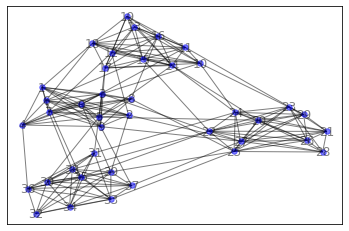

In [222]:
G = nx.planted_partition_graph(4, 10, 0.9, 0.05, seed=1)
nx.draw_networkx(G, node_size=30, alpha=0.5, node_color="blue", font_size='12', with_labels=True)
plt.show()

2. Write a programme to do spectral clustering as we discussed in the lectures using k-means.Remarks: k-means requires real inputs. You will need a routine which sets all (very small, but non-zero) imaginary parts of the eigenvectors to zero.


In [223]:
def plot_ev(L,k):
    plt.plot(L[:k],"-d")
    plt.xlabel("$i$")
    plt.ylabel("$\lambda_i$")
    plt.show()

In [224]:
def cluster_Laplacian(G):
    G_Lap = nx.laplacian_matrix(G, nodelist=None, weight=None)
    G_Lap = G_Lap.astype(float)
    G_Lap_dense = G_Lap.todense()
    Eval,Evec = np.linalg.eigh(G_Lap_dense)
    Eval = Eval.real
    Evec = Evec.real
    idx = np.argsort(Eval)
    plot_ev(Eval,40)
    Evec = Evec[:,idx]
    model = cluster.KMeans(n_clusters=4, n_init=200)
    model.fit(Evec[:,:4])
    return model 

In [225]:
def cluster_walk(G):
    G_Ad = nx.adjacency_matrix(G, nodelist=None, weight=None)
    G_D = G_Ad.sum(axis=1)
    G_D = sp.sparse.spdiags(G_D.flatten(), [0], len(G.nodes), len(G.nodes), format='csr')
    G_Markov = G_Ad.dot(sp.sparse.linalg.inv(G_D))
    G_Markov = G_Markov.astype(float);
    Eval,Evec = np.linalg.eig(G_Markov.todense())
    Eval = Eval.real
    Evec = Evec.real
    idx = np.argsort(Eval)[::-1]
    Eval = Eval[idx]
    plot_ev(Eval,40)
    Evec = Evec[:,idx]
    model = cluster.KMeans(n_clusters=4, n_init=200)
    model.fit(Evec[:,:4])
    return model 

3. Test your programme with the network you generated above in (1). In k-means you need to specify the number of clusters k. Argue by using the spectrum of your respective matrices how you should be choosing k.
Reasoning: We observe from the plot of eigenvalues, lambda_1, lambda_2, lambda_3, lambda_4 are quite close together, a significant spectral gap happened at lambda_4 - lambda_5 for both the graph laplacian and the random walk matrix.Therefore, we choose k = 4. 

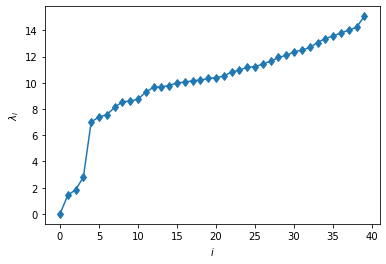

[0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1]


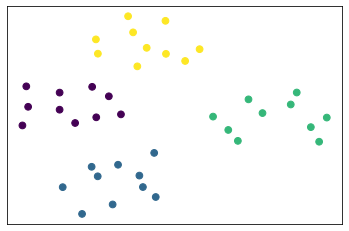

In [226]:
result = cluster_Laplacian(G).labels_ 
print(result)
pos = nx.spring_layout(G,seed=1)
nx.draw_networkx_nodes(G,pos,node_size=45,node_color=result)

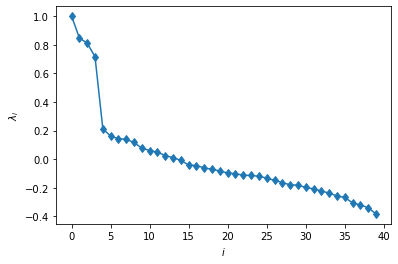

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0]


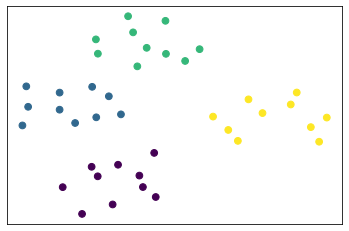

In [227]:
result = cluster_walk(G).labels_ 
print(result)
pos = nx.spring_layout(G,seed=1)
nx.draw_networkx_nodes(G,pos,node_size=45,node_color=result)